In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
import plotly.express as px
from plotly.offline import offline, iplot
import plotly.graph_objects as go
from datetime import datetime
from wordcloud import WordCloud, ImageColorGenerator
warnings.filterwarnings("ignore")



from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import joblib
import pickle  

In [90]:
heart = pd.read_csv('/kaggle/input/stroke-detection-dataset/heart.csv')
# heart = pd.read_csv('heart.csv')
heart

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [91]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [92]:
heart.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

In [93]:
heart.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [94]:
# from ydata_profiling import ProfileReport
# heart_report = ProfileReport(heart)
# heart_report

In [95]:
#remove duplicates
heart = heart.drop_duplicates()
heart.shape

(302, 14)

In [96]:
def custome_layout(title_size = 28, showlegend = False):
    fig.update_layout(
    showlegend = showlegend,
    title = {
        "x": 0.5,
        "font" :{
            "size" :title_size,
            "family" : "tahoma"
        }
        
    },
    hoverlabel = {
        "bgcolor" :"#111",
        "font_size" : 16,
        "font_family" :"arial"
    }

    )

What is the age distribution of patients❓

In [97]:
age_mean = np.mean(heart['age'].to_list())
age_median = np.median(heart['age'].to_list())
print(f"Average Age: {age_mean:0.2f}")
print(f"Median Age: {age_median}")

Average Age: 54.42
Median Age: 55.5


In [98]:
fig = px.histogram(heart["age"],
                   nbins=48,
                   title="The Distribution of Age",
                   template="plotly_white")

custome_layout()

fig.add_vline(
    x=age_mean,
    line_dash="dash",
    line_color="green",
    annotation_text=f"Mean: {age_mean:.1f}",
    annotation_position="top left",
    annotation_font_size=14,
    annotation_font_color="green"
)
fig.add_vline(
    x=age_median,
    line_dash="dash",
    line_color="red",
    annotation_text=f"Median: {age_median:.1f}",
    annotation_position="top",
    annotation_font_size=14,
    annotation_font_color="red"
)

fig.update_traces(
    hovertemplate = "Age: %{x}<br>Frequency: %{y}",
    marker=dict(line=dict(color='#111', width=1))
)

fig.show()


In [99]:
fig = px.histogram(heart, x="age", nbins=30, color="sex",
                   title="Age Distribution by Gender",
                   opacity=0.7, barmode="overlay",
                   color_discrete_sequence=["blue", "red"])  
                   
fig.update_layout(title_x=0.5, font_size=18)  
fig.update_traces(
    hovertemplate = "Age: %{x}<br>Frequency: %{y}",
    marker=dict(line=dict(color='#111', width=1))
)
fig.show()


Is there a significant difference in stroke occurrence between males and females❓

In [100]:
gender = heart["sex"].value_counts()
gender

sex
1    206
0     96
Name: count, dtype: int64

In [101]:
fig = px.pie(
    heart,
    names='sex',
    title='Gender Distribution of Patients',
    color_discrete_sequence=['blue', 'red']
)
fig.update_layout(  
    title = {
        "x": 0.5,
        "font" :{
            "size" :28,
            "family" : "tahoma"
        }
    }
)  
fig.update_traces(
    textinfo='percent+label',
    hovertemplate='%{label}: %{value} <br>Percentage: %{percent}',
    # marker=dict(line=dict(color='#111', width=1)),
    hole=0.4,
    pull=[0.1, 0]
)
fig

How do cholesterol levels vary among stroke patients❓

In [102]:
fig = px.box(heart, x="target", y="cholestoral", color="target",
             title="Cholesterol Levels in Patients",
             labels={"target": "Heart disease", "cholestoral": "Cholesterol"},
             color_discrete_sequence=["blue", "red"])

fig.update_layout(title_x=0.5)
fig.show()


Is there a correlation between resting blood pressure and heart disease❓


In [103]:
fig = px.scatter(heart, x="resting_bp", y="age", color="target",
                 title="Resting Blood Pressure vs Age",
                 labels={"resting_bp": "Resting Blood Pressure", "age": "Age", "target": "Heart Disease"},
                 trendline="ols",
                 color_continuous_scale=px.colors.sequential.Viridis)  

custome_layout()
fig.update_layout(title_x=0.5)
fig.show()



In [104]:
fig = px.box(heart, x="target", y="resting_bp", color="target",
             title="Resting Blood Pressure in Patients",
             labels={"target": "Heart disease", "resting_bp": "Blood Pressure"},
            #  color_discrete_sequence=["blue", "red"]
            color_discrete_sequence=px.colors.qualitative.Set2            
            )
            

fig.update_layout(title_x=0.5)
fig.show()


Is fasting blood sugar a significant indicator of heart disease❓


In [105]:
blood_sugar = heart['fasting_blood_sugar'].value_counts()
blood_sugar


fasting_blood_sugar
0    257
1     45
Name: count, dtype: int64

In [106]:
fig = px.histogram(heart, 
                   x="fasting_blood_sugar", 
                   color="target", 
                   barmode="group",
                   text_auto=True,
                   labels={"fasting_blood_sugar": "Fasting Blood Sugar", 
                           "target": "Heart Disease (0 = No, 1 = Yes)"},
                   title="Heart Disease vs. Fasting Blood Sugar",
                   color_discrete_sequence=px.colors.sequential.Viridis)


fig.update_layout(title_x=0.5, font_size=18)
fig.update_traces(
    hovertemplate="Fasting Blood Sugar: %{x}<br>Frequency: %{y}",
    marker=dict(line=dict(color='#111', width=1))
)



How does the maximum heart rate achieved vary between patients with and without heart disease❓


In [107]:
fig = px.box(heart, x="target", y="max_hr", color="target",
             title="Max Heart Rate in Patients",
             labels={"target": "Heart disease", "max_hr": "Max Heart Rate"},
             color_discrete_sequence=px.colors.qualitative.Vivid
             )
             
fig.update_layout(title_x=0.5, font_size=18)
fig.update_traces(
    hovertemplate="Max Heart Rate: %{y}", #with outliers
    marker=dict(line=dict(color='#111', width=1))
)

What is the impact of exercise-induced angina on heart disease❓

In [108]:
fig = px.histogram(
    heart,
    x='exang',
    color='target',
    barmode='group',
    title='Impact of Exercise-Induced Angina on Heart Disease',
    labels={'exang':'Exercise Angina', 'target':'Heart Disease'},
    text_auto=True,
    color_discrete_sequence=px.colors.sequential.Cividis
)

fig.update_layout(title_x=0.5, font_size=18)
fig.update_traces(
    hovertemplate='Exercise Angina: %{x}<br>Frequency: %{y}',
    marker=dict(line=dict(color='#111', width=1))
)

What are the most correlated factors in heart disease presence❓


In [109]:
correlation = heart.corr()["target"].drop("target").abs().sort_values(ascending=False)

correlation_df = correlation.reset_index()
correlation_df.columns = ["Feature", "Correlation"]

# print(correlation_df.head(10))  

fig = px.bar(correlation_df, 
             x="Feature", 
             y="Correlation", 
             text=correlation_df['Correlation'].apply(lambda x: f"{x:.3f}"), 
             color="Correlation", 
             color_continuous_scale="reds",  # Red color for strong correlation
             title="Most Correlated Factors with Heart Disease")

fig.update_layout(xaxis_title="Feature", yaxis_title="Correlation Strength", title_x=0.5, font_size=14)
fig.update_traces(
    hovertemplate="Feature: %{x}<br>Correlation: %{y}",
    marker=dict(line=dict(color='#111', width=1))
)

fig.show()

In [110]:
value_counts = {col: heart[col].value_counts() for col in heart.columns}

for col, counts in value_counts.items():
    print(f"Value count for this column {col}:")
    print(counts)
    print("\n")

Value count for this column age:
age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64


Value count for this column sex:
sex
1    206
0     96
Name: count, dtype: int64


Value count for this column chest_pain_type:
chest_pain_type
0    143
2     86
1     50
3     23
Name: count, dtype: int64


Value count for this column resting_bp:
resting_bp
120    37
130    36
140    32
110    19
150    17
128    12
138    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94     

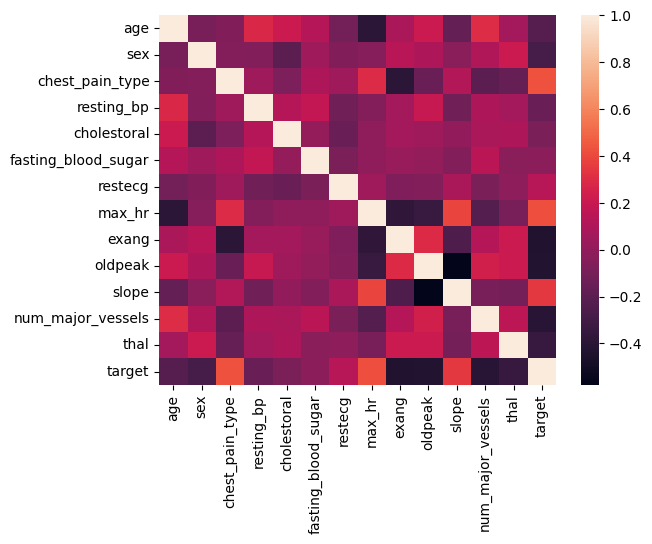

In [111]:
corr_matrix = heart.corr(method='pearson')
ax=sns.heatmap(corr_matrix)

In [112]:
target_corr = corr_matrix[['target']]
target_corr_sorted = target_corr.abs().sort_values(by='target', ascending=False)
target_corr_sorted

,target
target,1.000000
exang,0.435601
chest_pain_type,0.432080
oldpeak,0.429146
max_hr,0.419955
num_major_vessels,0.408992
slope,0.343940
thal,0.343101
sex,0.283609
age,0.221476


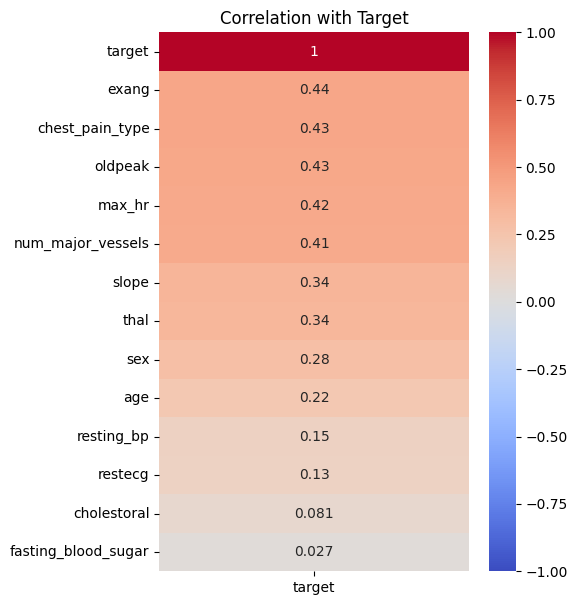

In [113]:
plt.figure(figsize=(5, len(target_corr)*0.5)) # adjust the size as needed
sns.heatmap(target_corr_sorted, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Target')
plt.show()

In [114]:
columns_list=['age', 'sex', 'chest_pain_type', 'resting_bp', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope', 'thal' ]

X, y = heart[columns_list], heart['target']


In [115]:
SC = StandardScaler()
X = SC.fit_transform(X)
joblib.dump(SC, 'Standard_scaler.pkl')

['Standard_scaler.pkl']

In [116]:
X

array([[ 0.94979429,  0.68265615,  1.97647049, ...,  1.08402203,
        -2.27118179, -2.1479552 ],
       [-1.92854796,  0.68265615,  1.005911  , ...,  2.11892611,
        -2.27118179, -0.51399432],
       [-1.48572607, -1.46486632,  0.0353515 , ...,  0.30784398,
         0.97951442, -0.51399432],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ...,  2.0326841 ,
        -0.64583368,  1.11996657],
       [ 0.28556146,  0.68265615, -0.93520799, ...,  0.13535997,
        -0.64583368,  1.11996657],
       [ 0.28556146, -1.46486632,  0.0353515 , ..., -0.8995441 ,
        -0.64583368, -0.51399432]])

In [117]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [118]:
def evaluate_models(X, y):
    results = []
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        ('Logistic Regression', LogisticRegression(max_iter=1000)),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('Support Vector Machine', SVC()),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ]

    # Evaluate each model
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        results.append((name, accuracy, precision, recall, f1))

    # Create a DataFrame to display results
    df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    df_styled = df.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1'], color='blue')
    display(df_styled)


In [119]:
evaluate_models(X,y)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.868852,0.868852,0.868852,0.868852
1,Decision Tree,0.803279,0.805218,0.803279,0.803384
2,Random Forest,0.885246,0.889539,0.885246,0.885246
3,Gradient Boosting,0.803279,0.809808,0.803279,0.803067
4,AdaBoost,0.803279,0.809808,0.803279,0.803067
5,Support Vector Machine,0.836066,0.838040,0.836066,0.836154
6,K-Nearest Neighbors,0.852459,0.856593,0.852459,0.852459
7,Naive Bayes,0.819672,0.829851,0.819672,0.819187
8,XGBoost,0.819672,0.823647,0.819672,0.819672


# After Show Many different Models : fit and training and save the model

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Result of Random Forest Classifier:-")
print("Accuracy : "+str(accuracy))
print("precision : "+str(precision))
print("recall : "+str(recall)  )
print("f1 : "+str(f1))

Result of Random Forest Classifier:-
Accuracy : 0.8852459016393442
precision : 0.9310344827586207
recall : 0.84375
f1 : 0.8852459016393444


In [121]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[27  2]
 [ 5 27]]


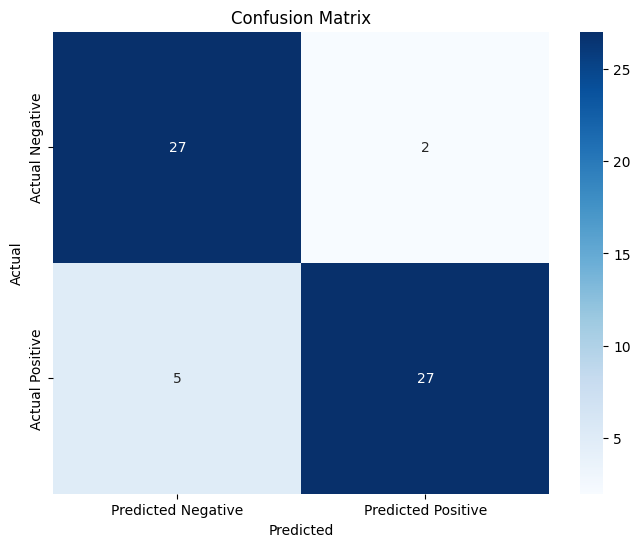

In [122]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [123]:
stroke = pd.read_csv('/kaggle/input/stroke-detection-dataset/healthcare-dataset-stroke-data.csv')
# stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [124]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [125]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [126]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [127]:
# from ydata_profiling import ProfileReport
# stroke_report = ProfileReport(stroke)
# stroke_report

In [128]:
stroke = stroke.dropna()
stroke.shape

(4909, 12)

In [129]:
stroke = stroke.drop(stroke[stroke['gender'] == 'Other'].index)
stroke.shape

(4908, 12)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Result of Random Forest Classifier:-")
print("Accuracy : "+str(accuracy))
print("precision : "+str(precision))
print("recall : "+str(recall)  )
print("f1 : "+str(f1))

Result of Random Forest Classifier:-
Accuracy : 0.8852459016393442
precision : 0.9310344827586207
recall : 0.84375
f1 : 0.8852459016393444
